# Sentiment analysis with Naive Bayes classifier
This example performs sentiment analysis on the CC dataset, which contains Amazon product reviews and their respective rating labels (negative, neutral, and positive).

In [1]:
import numpy as np
import pandas as pd
from NB import NaiveBayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

First, the data is read and the NA values are discarded:

In [2]:
data = pd.read_csv('reviews.csv')
data = data.dropna(axis=0)
data.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


The following pie chart shows the distribution of classes in the dataset:

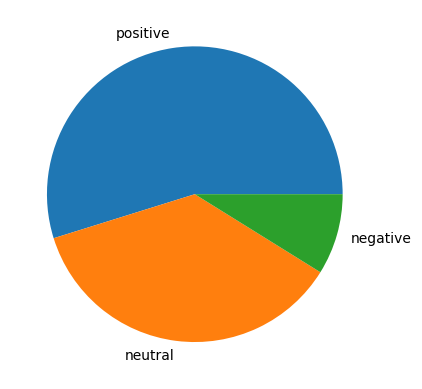

In [3]:
# distribution of classes
classes = data['sentiments'].values
labels = ['positive', 'neutral', 'negative']
dims = [len(classes[classes==li]) for li in labels]

fig, ax = plt.subplots()
ax.pie(dims, labels=labels)
plt.show()

Since there are imbalanced classes, we opt for F1 score as a performance metric.Experiments were performed with the Naive Bayes classifier and its binary counting variant. Both classifiers were evaluated with the F1 score under the same training-test split.

In [4]:
reviews = data['cleaned_review'].values
X_train, X_test, y_train, y_test = train_test_split(reviews, classes, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((13869,), (3468,))

## Naive bayes

F1-score: 0.6313394204331145


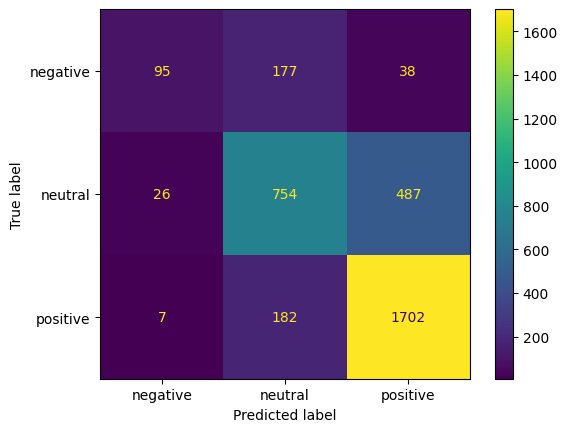

In [5]:
classifier = NaiveBayes(binary_count=False)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
f1 = f1_score(y_test, preds, average='macro')

# confussion matrix
cm = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes)

cm_display.plot()
print(f'F1-score: {f1}')

## Naive-bayes with binary counting

F1-score: 0.606220505165175


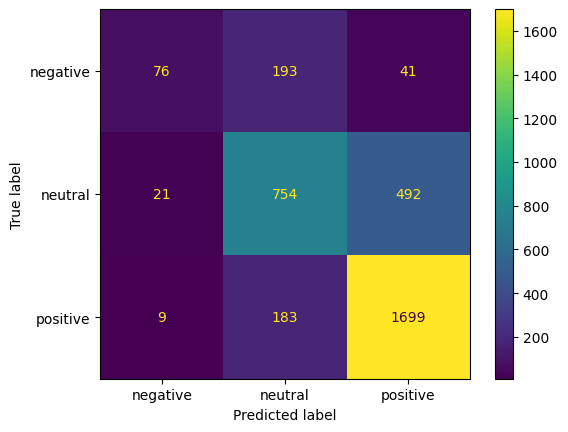

In [6]:
classifier = NaiveBayes(binary_count=True)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
f1 = f1_score(y_test, preds, average='macro')

# confussion matrix
cm = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes)

cm_display.plot()
print(f'F1-score: {f1}')